In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
os.listdir()
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


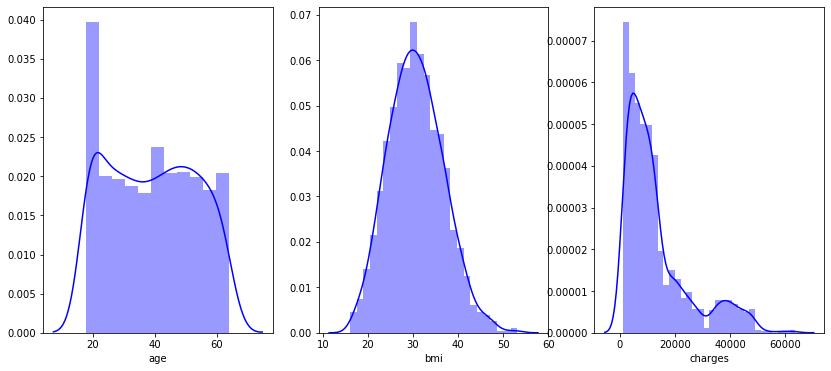

In [7]:
columns = ['age','bmi','charges']

fig, axis = plt.subplots(1, 3,figsize=(14,6))
for index,col in enumerate(columns):
    sns.distplot(insurance[col],kde=True,color='blue',norm_hist=False, ax=axis[index])

##Age is uniforrm distribution
##BMI is normal idstribution
## Right skewed - Take log

In [8]:
cont_cols = []
for col in insurance.columns:
    if insurance.dtypes[col] == int:
        cont_cols.append(col)
    elif insurance.dtypes[col] == float:
        cont_cols.append(col)     

In [9]:
insurance['sex'].value_counts()/len(insurance)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [10]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [11]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
insurance.smoker.value_counts()/len(insurance)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

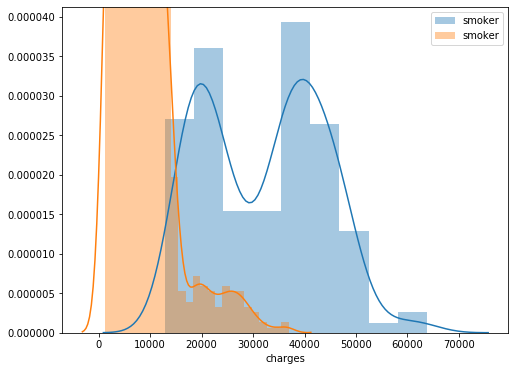

In [13]:
plt.figure(figsize = (8,6))
sns.distplot(insurance[insurance.smoker == 'yes'].charges,label = 'smoker' )
sns.distplot(insurance[insurance.smoker == 'no'].charges,label = 'smoker' )
plt.legend()

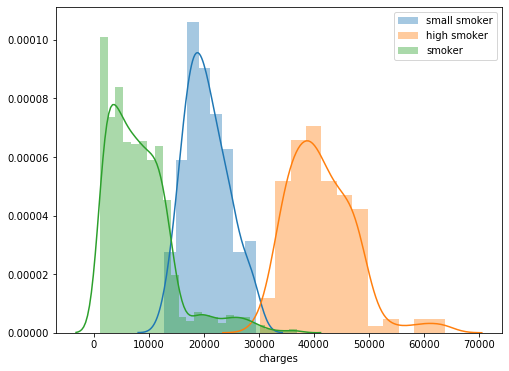

In [14]:
plt.figure(figsize = (8,6))
sns.distplot(insurance[(insurance.smoker == 'yes') & (insurance.charges < 30000)].charges,label = 'small smoker' )
sns.distplot(insurance[(insurance.smoker == 'yes') & (insurance.charges > 30000)].charges,label = 'high smoker' )
sns.distplot(insurance[insurance.smoker == 'no'].charges,label = 'smoker' )
plt.legend()

In [15]:
lam = 1/insurance[insurance.smoker=='no'].charges.mean()

In [16]:
import math as m
lam**(-1)*m.log(2)

5846.189290745153

In [17]:
insurance.groupby('smoker')["children"].value_counts()

smoker  children
no      0           459
        1           263
        2           185
        3           118
        4            22
        5            17
yes     0           115
        1            61
        2            55
        3            39
        4             3
        5             1
Name: children, dtype: int64

In [18]:
pd.crosstab(insurance.smoker,insurance.children)

children,0,1,2,3,4,5
smoker,,,,,,
no,459,263,185,118,22,17
yes,115,61,55,39,3,1


In [19]:
insurance.groupby(['smoker','sex']).count()

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

In [20]:
insurance.groupby('smoker')['sex'].value_counts()/insurance.groupby('smoker')['sex'].count()

smoker  sex   
no      female    0.514098
        male      0.485902
yes     male      0.580292
        female    0.419708
Name: sex, dtype: float64

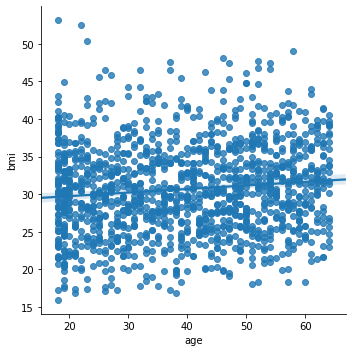

In [21]:
sns.lmplot(x = 'age',y = 'bmi', data=insurance)

In [22]:
insurance.groupby("region")['smoker'].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

In [23]:
cont_cols.remove('children')

In [24]:
cont_cols

['age', 'bmi', 'charges']

In [25]:
for col in cont_cols:
    print(col,insurance[col].nunique())

age 47
bmi 548
charges 1337


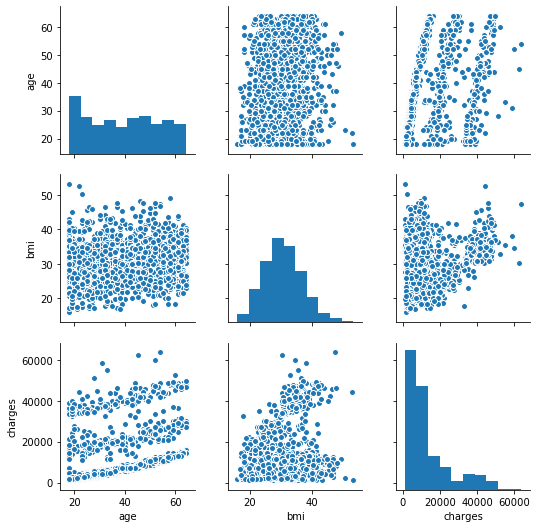

In [26]:
sns.pairplot(insurance[cont_cols])

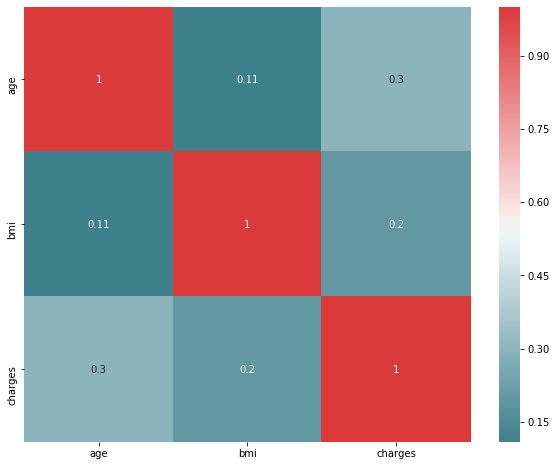

In [27]:
plt.figure(figsize = (10,8))
colormap = sns.diverging_palette(210,12,as_cmap=True)
sns.heatmap(insurance[cont_cols].corr(),annot=True, cmap = colormap)

In [28]:
cat_cols = []
for col in insurance.columns:
    if insurance.dtypes[col] == object:
        cat_cols.append(col)

In [29]:
cat_cols.append('children')

In [30]:
cat_cols

['sex', 'smoker', 'region', 'children']

In [31]:
for col in cat_cols:
    print(col,insurance[col].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']
children [0 1 3 2 5 4]


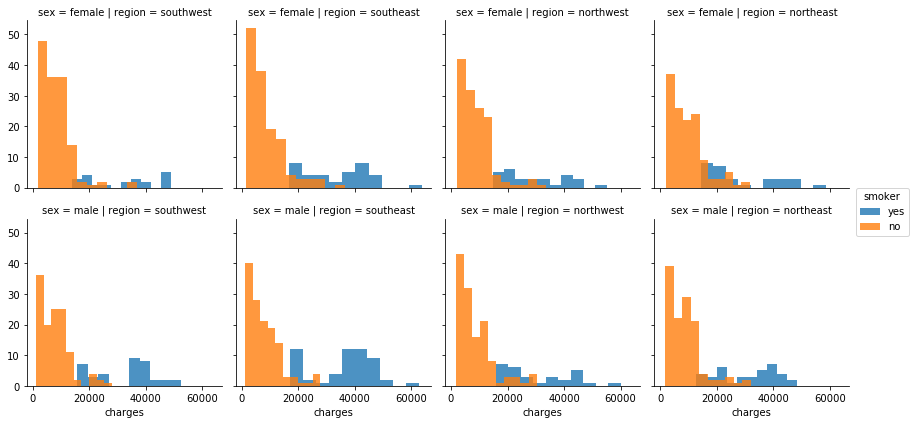

In [32]:
his = sns.FacetGrid(insurance,row='sex',col = 'region',hue='smoker')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

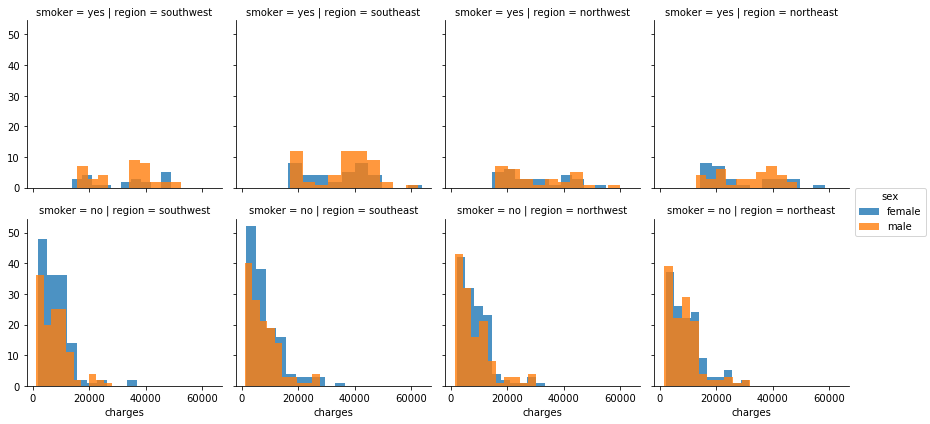

In [33]:
his = sns.FacetGrid(insurance,row='smoker',col = 'region',hue='sex')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

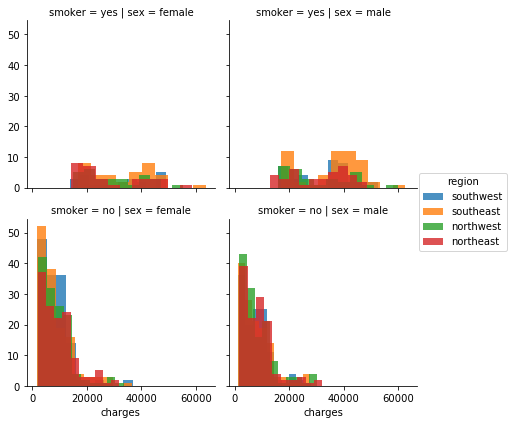

In [34]:
his = sns.FacetGrid(insurance,row='smoker',col = 'sex',hue='region')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

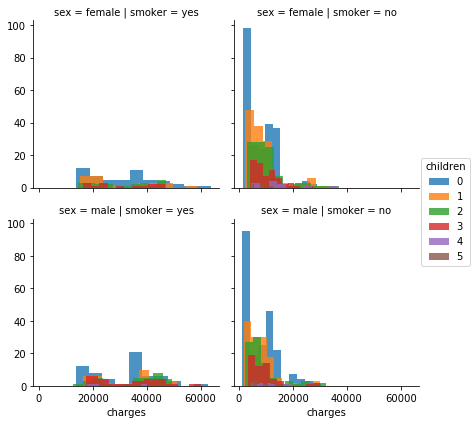

In [35]:
his = sns.FacetGrid(insurance,row='sex',col = 'smoker',hue='children')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

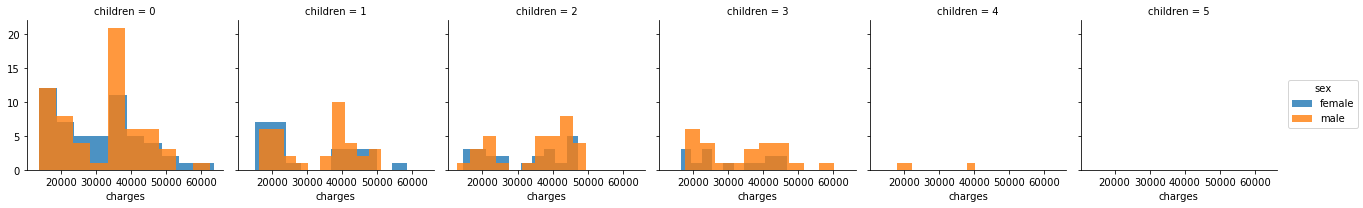

In [36]:
his = sns.FacetGrid(insurance[insurance.smoker=='yes'][['sex','children','charges']],col='children',hue='sex')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

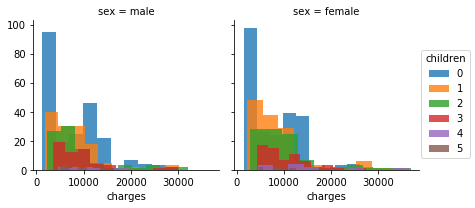

In [37]:
his = sns.FacetGrid(insurance[insurance.smoker=='no'][['sex','children','charges']],col='sex',hue='children')
his.map(plt.hist,'charges',alpha=0.80)
his.add_legend()

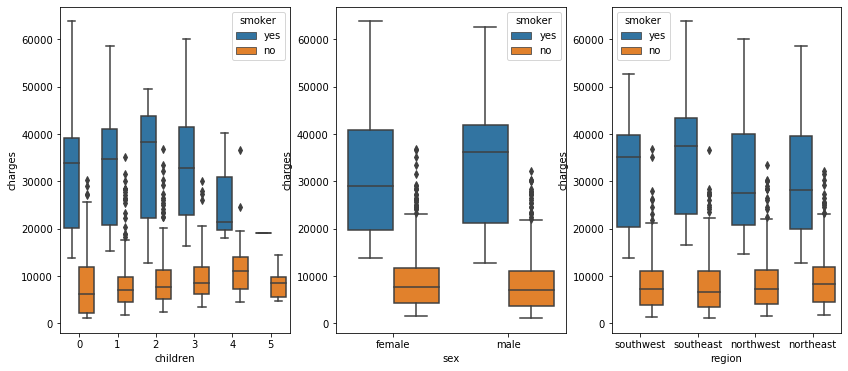

In [38]:
fig, axis = plt.subplots(1, 3,figsize=(14,6))

sns.boxplot(x='children',y='charges',hue='smoker',data=insurance,ax=axis[0])
sns.boxplot(x='sex',y='charges',hue='smoker',data=insurance,ax=axis[1])
sns.boxplot(x='region',y='charges',hue='smoker',data=insurance,ax=axis[2])

In [39]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
print('Group By analysis for mean of charges'); print()
for col in cat_cols:
    print('Group By',col.upper()); print('----------------')
    print(insurance.groupby(col).charges.mean()); print()

Group By analysis for mean of charges

Group By SEX
----------------
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Group By SMOKER
----------------
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Group By REGION
----------------
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Group By CHILDREN
----------------
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64



In [41]:
insurance[insurance.smoker=='no'].groupby('children')["charges"].mean()

children
0     7611.793335
1     8303.109350
2     9493.093674
3     9614.519391
4    12121.344408
5     8183.845556
Name: charges, dtype: float64

In [42]:
insurance[insurance.smoker=='yes'].groupby('children')["charges"].mean()

children
0    31341.363954
1    31822.654334
2    33844.235755
3    32724.915268
4    26532.276933
5    19023.260000
Name: charges, dtype: float64

In [43]:
insurance[insurance.children == 5].charges.mean()

8786.035247222222

In [44]:
insurance[cat_cols +['charges']].groupby(cat_cols).charges.mean().to_frame().sort_values(by='charges')

charges
sex    smoker region    children              
male   no     southeast 0          6407.771794
              northeast 3          6589.446369
              southwest 1          6664.469570
                        4          6785.720000
                        5          6864.669500
female no     southeast 2          6922.901104
male   no     northeast 5          6978.973483
female no     southwest 5          7023.777000
                        0          7221.163847
male   no     northwest 0          7528.533219
female no     northwest 0          7560.081485
male   no     southwest 2          7588.339285
female no     southeast 0          7746.724172
male   no     northwest 1          7808.828496
female no     southeast 1          7893.360753
male   no     northeast 0          7959.294951
              southeast 2          8068.380377
female no     northeast 0          8169.643466
male   no     southeast 1          8174.217802
              northwest 4          8186.932383
female no     northwest 1          8196.134472
male   no     southwest 0          8336.496361
female no     southwest 3          8438.736294
                        1          8575.394940
male   no     southeast 4          8726.908900
              southwest 3          8889.829505
              northeast 1          8912.300021
female no     northeast 3          8962.795292
              northwest 5          8965.795750
male   no     northwest 2          9267.693752
...                                        ...
       yes    northwest 1         21799.780210
female yes    southeast 1         23376.316067
              northeast 0         24834.340357
                        2         24864.901300
male   yes    northwest 0         27109.415907
female yes    southwest 0         27428.377303
              northwest 0         28837.312216
male   yes    southwest 4         29062.176000
female yes    northeast 3         29223.835013
male   yes    northeast 0         29394.857139
female yes    northwest 2         29788.509275
                        3         30457.809587
              northeast 1         31083.684598
male   yes    northwest 2         31741.994686
female yes    southeast 3         31802.646867
              northwest 1         32308.585075
male   yes    southwest 1         32457.949428
                        0         33134.029639
              southeast 3         33450.005380
              northeast 1         33847.858805
female yes    southeast 2         34046.011480
male   yes    southeast 0         34889.049480
                        1         35925.520642
female yes    southeast 0         36207.879515
              southwest 2         36861.546857
male   yes    northeast 3         37190.632967
female yes    southwest 1         38036.632000
male   yes    southwest 2         38064.897787
              northwest 3         38694.556351
              southeast 2         38993.289915

[80 rows x 1 columns]

In [45]:
insurance[['smoker','children','age','charges']].groupby(['smoker','children']).agg({
    'age' : lambda x : np.mean(x),
    'charges' : lambda y : np.mean(y)
})

age       charges
smoker children                         
no     0         38.858388   7611.793335
       1         39.372624   8303.109350
       2         39.421622   9493.093674
       3         41.822034   9614.519391
       4         40.227273  12121.344408
       5         35.411765   8183.845556
yes    0         36.791304  31341.363954
       1         39.803279  31822.654334
       2         39.527273  33844.235755
       3         40.794872  32724.915268
       4         30.000000  26532.276933
       5         39.000000  19023.260000

In [46]:
insurance[['smoker','children','bmi','age','charges']].groupby(['smoker','children'])['age','bmi','charges'].mean()

age        bmi       charges
smoker children                                    
no     0         38.858388  30.551950   7611.793335
       1         39.372624  30.564886   8303.109350
       2         39.421622  30.881162   9493.093674
       3         41.822034  30.738432   9614.519391
       4         40.227273  31.675455  12121.344408
       5         35.411765  30.270000   8183.845556
yes    0         36.791304  30.543696  31341.363954
       1         39.803279  30.874344  31822.654334
       2         39.527273  31.304182  33844.235755
       3         40.794872  30.520641  32724.915268
       4         30.000000  29.306667  26532.276933
       5         39.000000  18.300000  19023.260000

# As per the above analysis, Smoker is the best predictor, second comes children and bmi...

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz as gviz
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import sys
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
###initializing the class object.
dt_reg = DecisionTreeRegressor()
rfr = RandomForestRegressor(warm_start=False,oob_score=True)
lrm = LinearRegression()
lasso_reg = Lasso(alpha=1.0,normalize=True,random_state=12345)
ridge_reg = Ridge(alpha=1.0,normalize=True,random_state=12345)
xgb_reg = XGBRegressor()
aBoost_reg = AdaBoostRegressor()


model_dict = {'Decision_Tree': dt_reg, 'Random_Forest' : rfr, 'Linear_Regression' : lrm, 'Lasso' : lasso_reg\
             ,'Ridge' : ridge_reg, 'XGBoost' : xgb_reg, 'AdaBoost' : aBoost_reg}

In [49]:
X_train = insurance.drop('charges',axis=1)
y_train = insurance['charges']
X_train.shape, y_train.shape
X_train.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
###Performing Encoding
X_train_num = deepcopy(X_train)
X_train_num.sex = X_train.sex.map({"female" : 0 ,"male" : 1 })
X_train_num.smoker = X_train.smoker.map({"yes" : 1 ,"no" : 0 })
X_train_num = pd.concat([X_train_num,pd.get_dummies(X_train.region, drop_first =True,dummy_na=False ,prefix='region',prefix_sep='_')],axis=1)
X_train_num.drop('region',axis=1,inplace=True)

In [51]:
X_train_num.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [52]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [53]:
X_train.shape,y_train.shape,X_train_num.shape

((1338, 6), (1338,), (1338, 8))

In [54]:
for name, model in model_dict.items():
    try:
        model.fit(X_train,y_train)
    except ValueError:
        print(name,': ',sys.exc_info()[1])

Decision_Tree :  could not convert string to float: 'female'
Random_Forest :  could not convert string to float: 'female'
Linear_Regression :  could not convert string to float: 'female'
Lasso :  could not convert string to float: 'female'
Ridge :  could not convert string to float: 'female'
XGBoost :  DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields sex, smoker, region
AdaBoost :  could not convert string to float: 'female'


# Random Forest Regressor

In [55]:
rfr.fit(X_train_num,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [56]:
feature_importance = rfr.feature_importances_

In [57]:
rfr.oob_score_

0.7787701022075886

In [58]:
sum(feature_importance)

0.9999999999999998

In [59]:
cols = X_train.columns.values

In [60]:
feature_imp_matrix = {}
for x,y in zip(cols,feature_importance):
    feature_imp_matrix[x] = np.round(y*100,decimals=2)

In [61]:
feature_imp_matrix = dict(sorted(feature_imp_matrix.items(),key = lambda x: x[1], reverse=True))

In [62]:
feature_imp_matrix

{'smoker': 60.43,
 'bmi': 22.44,
 'age': 12.99,
 'children': 1.96,
 'region': 0.63,
 'sex': 0.6}

In [63]:
df =pd.DataFrame.from_dict(feature_imp_matrix,orient='index').reset_index()

In [64]:
df = df.rename(columns = {'index' : 'features',0 :'%Importance'})
df['cumsum'] = np.cumsum(df['%Importance'])

In [65]:
df

,features,%Importance,cumsum
0,smoker,60.43,60.43
1,bmi,22.44,82.87
2,age,12.99,95.86
3,children,1.96,97.82
4,region,0.63,98.45
5,sex,0.60,99.05


In [66]:
rfr_rmse = np.sqrt(mse(y_train,rfr.predict(X_train_num)))
rfr_rmse

2064.73833273423

# As per the Random Forest Regressor, Smoker, bmi and age constitue ~96% of the importance

# Even if we use 3 variables, we are getting 72% accuracy which is similar to accuracy with all variables

# Lets check lasso regularisation for dimensionality reduction

In [67]:
lasso_reg.fit(X_train_num,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=12345,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_reg.coef_

array([  254.80854752,   -47.85352052,   330.26399605,   444.44323298,
       23748.15802518,   -89.02542586,  -737.47812933,  -684.44399109])

Even the Lasso regularisation is showing , smoking is a very significant factor.

In [69]:
for col,coef in zip(X_train_num.columns,lasso_reg.coef_):
    print(col,np.round(coef,decimals=2))

age 254.81
sex -47.85
bmi 330.26
children 444.44
smoker 23748.16
region_northwest -89.03
region_southeast -737.48
region_southwest -684.44


In [70]:
lasso_reg_rmse = np.sqrt(mse(y_train,lasso_reg.predict(X_train_num)))
lasso_reg_rmse

6043.40007018966

# Lets look at Ridge Regressor now

In [71]:
ridge_reg.fit(X_train_num,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=12345, solver='auto', tol=0.001)

In [72]:
ridge_reg.coef_

array([  128.65438603,   308.8020061 ,   174.81864917,   291.3994257 ,
       11819.56357885,  -220.25220149,   239.05183637,  -418.41356885])

In [73]:
for col,coef in zip(X_train_num.columns,ridge_reg.coef_):
    print(col,np.round(coef,decimals=2))

age 128.65
sex 308.8
bmi 174.82
children 291.4
smoker 11819.56
region_northwest -220.25
region_southeast 239.05
region_southwest -418.41


In [74]:
ridge_reg_rmse = np.sqrt(mse(y_train,ridge_reg.predict(X_train_num)))
ridge_reg_rmse

8000.435974455404

Point to note, As we say, Lasso reduces the insignificant feature's coef to a lot more extent than Ridge, Same is evident above

# Lets look at Linear model

In [75]:
lrm.fit(X_train_num,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
lrm.coef_

array([  256.85635254,  -131.3143594 ,   339.19345361,   475.50054515,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [77]:
for col,coef in zip(X_train_num.columns,lrm.coef_):
    print(col,np.round(coef,decimals=2))

age 256.86
sex -131.31
bmi 339.19
children 475.5
smoker 23848.53
region_northwest -352.96
region_southeast -1035.02
region_southwest -960.05


Please note, as Linear Regression is not regularised, the coeffecients are coming bigger

In [78]:
lrm_rmse = np.sqrt(mse(y_train,lrm.predict(X_train_num)))
lrm_rmse

6041.6796511744515

# Lets look at decision Tree Regressor

In [79]:
dt_reg.fit(X_train_num,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
dt_reg_rmse = np.sqrt(mse(y_train,dt_reg.predict(X_train_num)))
dt_reg_rmse

441.9486703188948

As we say, Decision Tree is very much prone to Overfit, You can see above, the RMSE is just 441. I am sure, if we predict on
a hold out data set, this classsifier will perform very bad, due to being Overfit
It has Very Low Bias and High Variance

# Lets look at XG Boost Regressor

In [81]:
aBoost_reg.fit(X_train_num,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [82]:
aBoost_reg_rmse = np.sqrt(mse(y_train,aBoost_reg.predict(X_train_num)))
aBoost_reg_rmse

4975.908068583286

In [83]:
model_list =  ['dt_reg','rfr', 'lrm', 'lasso_reg','ridge_reg','aBoost_reg']

In [84]:
print('Model',':','RMSE')
for x in model_list:
    print(x,':',eval(x+'_rmse'))

Model : RMSE
dt_reg : 441.9486703188948
rfr : 2064.73833273423
lrm : 6041.6796511744515
lasso_reg : 6043.40007018966
ridge_reg : 8000.435974455404
aBoost_reg : 4975.908068583286


In [85]:
X_train_num.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [86]:
y_train.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Lets split the data into train and test and check the accuracy on both

In [87]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train_num,y_train,train_size=0.8,random_state=12345)

In [88]:
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((1070, 8), (268, 8), (1070,), (268,))

In [89]:
model_dict.pop('XGBoost')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [90]:
print('{0:20} {1:21} {2:32}'.format('Model_Name','Train_Set_RMSE','Test_Set_RMSE'))
for name,model in model_dict.items():
    model.fit(X_train_f,y_train_f)
    print('{0:20} {1:5} {2:22}'.format(name,np.round(np.sqrt(mse(y_train_f,model.predict(X_train_f))),decimals=2),np.round(np.sqrt(mse(y_test_f,model.predict(X_test_f))),decimals=2) ))


Model_Name           Train_Set_RMSE        Test_Set_RMSE                   
Decision_Tree        270.24                6578.12
Random_Forest        2106.94                4848.89
Linear_Regression    6098.18                5847.45
Lasso                6099.58                5829.68
Ridge                8071.37                7637.98
AdaBoost             5001.11                4739.39


# Final Decision 
1. Decision Tress is pure case of Overfitting .. See the difference between train and test RMSE
2. Random Forest is also somewhat overfit.
3. Linear Regression is a generalised model but not performing good as compared to others in test.
4. Lasso model is much better.
5. Ridge, L2 penalty is not working out here.
6. Adaboost is the best model, where train and test rmse are close and comparitevely close to RF.

# Lets do some Hyperparameter optimization and check again

In [91]:
model_dict

{'Decision_Tree': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'Random_Forest': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
 'Linear_Regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'Lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=True, positive=False, precompute=False, random_state=12345,
    selec

In [92]:
model_list.remove('lrm')

In [93]:
model_list

['dt_reg', 'rfr', 'lasso_reg', 'ridge_reg', 'aBoost_reg']

In [94]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# In Class changes

In [165]:
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].copy()

In [166]:
X.sex = X.sex.map(lambda x : 1 if x == 'male' else 0)

In [167]:
X.smoker = X.smoker.map(lambda x : 1 if x == 'yes' else 0)

In [168]:
X = pd.concat([X,pd.get_dummies(X.region,drop_first=True,prefix='region')],axis=1)

In [169]:
X.head()

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [170]:
X.drop("region",axis=1,inplace=True)

In [171]:
X = X[['age', 'sex', 'bmi', 'children', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

In [172]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,1,16884.92400
1,18,1,33.770,1,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,1,0,4449.46200
3,33,1,22.705,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,1,0,0,3866.85520


In [173]:
y = X.pop('charges')

In [174]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [175]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lr = LinearRegression()

In [178]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
lr.coef_

array([  256.85635254,  -131.3143594 ,   339.19345361,   475.50054515,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [180]:
for col,coef in zip(X.columns,lr.coef_):
    print('{} ==> {}'.format(col,coef))

age ==> 256.85635253734864
sex ==> -131.3143593951149
bmi ==> 339.1934536108375
children ==> 475.50054514913086
smoker ==> 23848.534541912835
region_northwest ==> -352.96389942465333
region_southeast ==> -1035.022049387828
region_southwest ==> -960.0509913008312


In [181]:
print(lr.intercept_)

-11938.538576167157


In [182]:
len(X)

1338

In [183]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [184]:
print('RMSE', np.sqrt(mse(lr.predict(X),y)))

RMSE 6041.6796511744515


In [185]:
print('MAE', mae(lr.predict(X),y))

MAE 4170.886894163586


In [186]:
print('R2', r2(y,lr.predict(X)))

R2 0.7509130345985207


In [187]:
residuals = lr.predict(X)-y

In [188]:
y_hat = lr.predict(X)

# Assumptions checking

In [189]:
sum(residuals)

-4.170033207628876e-09

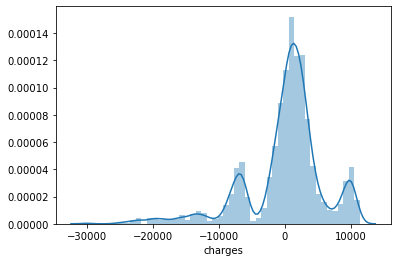

In [190]:
sns.distplot(residuals)

In [191]:
Z = insurance[residuals.abs()> 6000].join(residuals,rsuffix="_res").head()

In [192]:
def adj_r2(y,y_hat,p):
    r2_sc = r2(y,y_hat)
    n=len(y)
    return (1-(1-r2_sc)*(n-1)/(n-p-1))
    

In [193]:
adj_r2(y,y_hat,X.shape[1])

0.7494136397729285

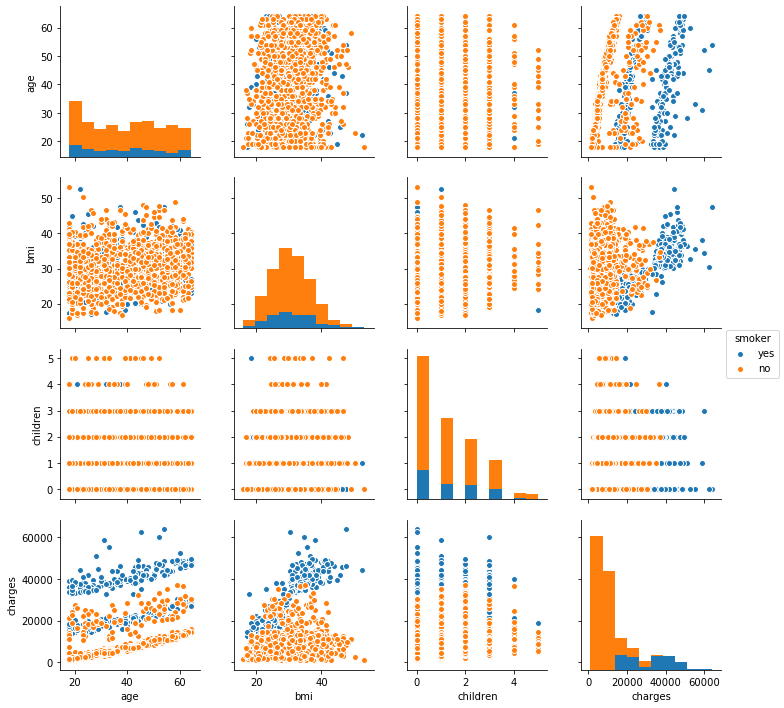

In [194]:
sns.pairplot(insurance,hue='smoker')

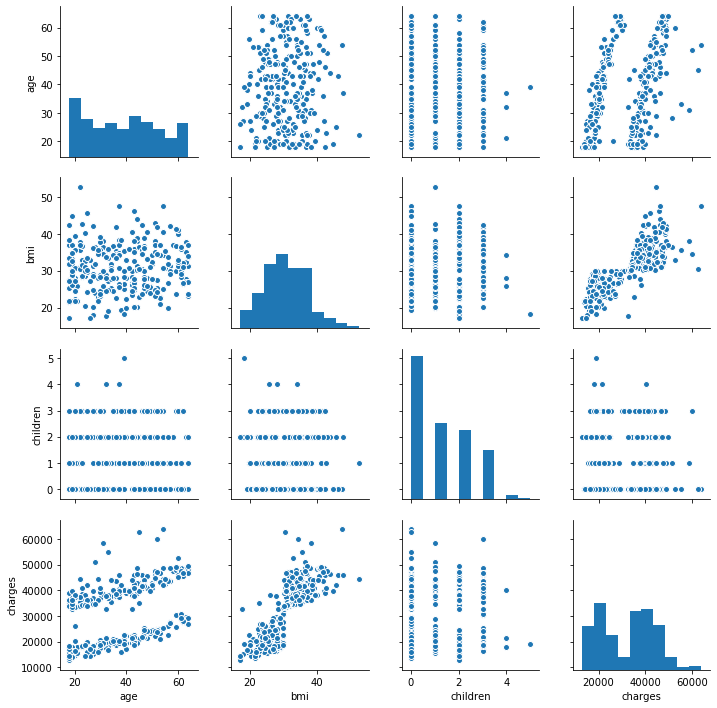

In [195]:
sns.pairplot(insurance[insurance.smoker=='yes'])

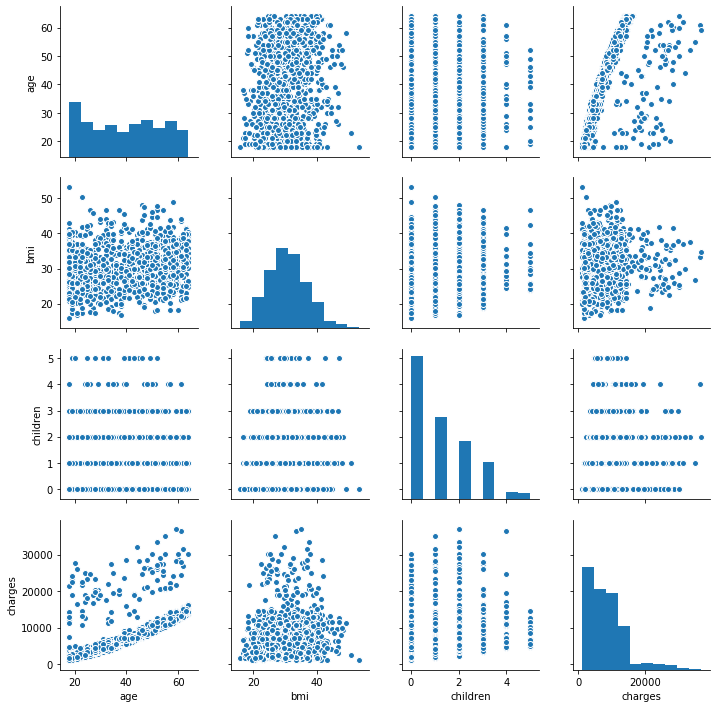

In [196]:
sns.pairplot(insurance[insurance.smoker=='no'])

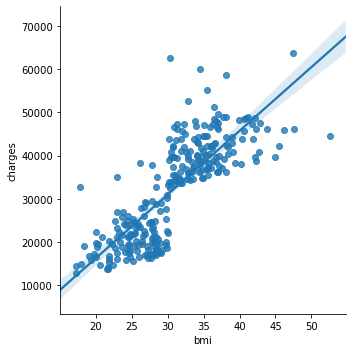

In [197]:
sns.lmplot(data = insurance[insurance.smoker=='yes'], x='bmi',y='charges')

In [198]:
from scipy.stats import pearsonr
pearsonr(insurance[insurance.smoker=='yes'].bmi, insurance[insurance.smoker=='yes'].charges)[0]

0.8064806070155406

In [199]:
X['Obese'] = X.bmi.map(lambda x:  1 if x> 30 else 0 )

In [200]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest', 'Obese'],
      dtype='object')

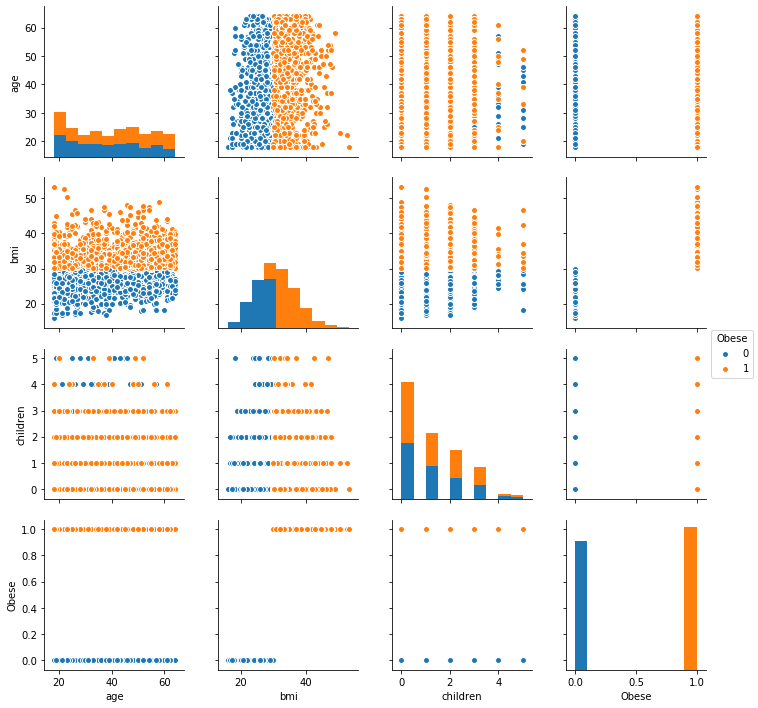

In [201]:
sns.pairplot(X[['age', 'bmi', 'children','Obese']],hue="Obese")

In [202]:
def obese_smoker(obese,smoker):
    if obese== 1 and smoker ==1:
        return "fat_smoker"
    elif obese== 1 and smoker ==0:
        return "fit_smoker"
    elif obese== 0 and smoker ==0:
        return "fit"
    else:
        return 'fat'

In [203]:
obese_smoker(1,0)

'fit_smoker'

In [204]:
X['fit_fat'] = X[['Obese','smoker']].apply(lambda x: obese_smoker(x['Obese'],x['smoker']),axis=1)
##df["fit_fat"]=df[["obese","smoker"]].apply(lambda x: obese_smoker(x["obese"],x["smoker"]),axis=1)

In [213]:
#X.head()
X = pd.concat([X,y],axis=1)

In [215]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,Obese,fit_fat,charges
0,19,0,27.900,0,1,0,0,1,0,fat,16884.92400
1,18,1,33.770,1,0,0,1,0,1,fit_smoker,1725.55230
2,28,1,33.000,3,0,0,1,0,1,fit_smoker,4449.46200
3,33,1,22.705,0,0,1,0,0,0,fit,21984.47061
4,32,1,28.880,0,0,1,0,0,0,fit,3866.85520


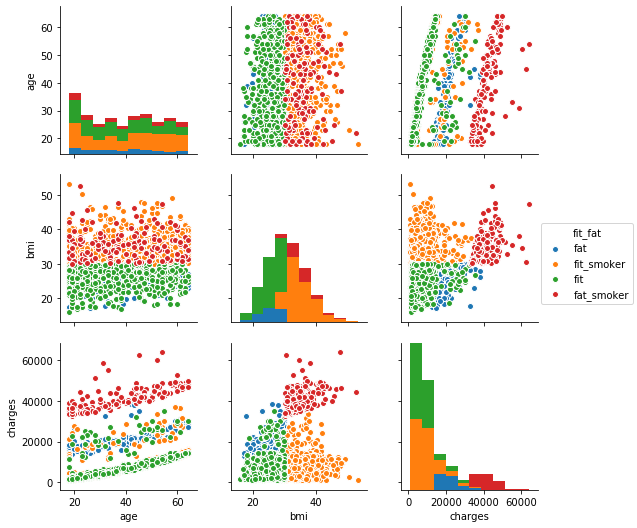

In [217]:
sns.pairplot(X[['age','bmi', 'charges','fit_fat']],hue="fit_fat")

In [219]:
dummy = X.pop('fit_fat')
X = pd.concat([X,pd.get_dummies(dummy)],axis=1)

In [223]:
X.head()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [224]:
X_f=X[['age', 'bmi', 'children', "fat","fat_smoker","fit","fit_smoker"]].copy()
#X.sex=X.sex.map(lambda x: 1 if x=="male" else 0)
#X.smoker=X.smoker.map(lambda x: 1 if x=="yes" else 0)
##X=X.join(pd.get_dummies(X.fit_fat)).drop(["fit_fat"],axis=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_f,y)
y_hat=lr.predict(X_f)
residuals=y-y_hat

print("MSE",mean_squared_error(y,y_hat))

print("RMSE",mean_squared_error(y,y_hat)**0.5)

print("MAE",mean_absolute_error(y,y_hat))

print("R squared",r2_score(y,y_hat))


MSE 19950178.065635122
RMSE 4466.562220056396
MAE 2457.464578583225
R squared 0.863861052012325
